In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("../Data/biodeg.csv")

In [5]:
data.head()

,SpMax_L,J_Dz(e),nHM,F01[N-N],F04[C-N],NssssC,nCb,C%,nCp,nO,...,C-026,F02[C-N],nHDon,SpMax_B(m),Psi_i_A,nN,SM6_B(m),nArCOOR,nX,class
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB


In [6]:
data.isna().sum()

SpMax_L        0
J_Dz(e)        0
nHM            0
F01[N-N]       0
F04[C-N]       0
NssssC         0
nCb            0
C%             0
nCp            0
nO             0
F03[C-N]       0
SdssC          0
HyWi_B(m)      0
LOC            0
SM6_L          0
F03[C-O]       0
Me             0
Mi             0
nN-N           0
nArNO2         0
nCRX3          0
SpPosA_B(p)    0
nCIR           0
B01[C-Br]      0
B03[C-Cl]      0
N-073          0
SpMax_A        0
Psi_i_1d       0
B04[C-Br]      0
SdO            0
TI2_L          0
nCrt           0
C-026          0
F02[C-N]       0
nHDon          0
SpMax_B(m)     0
Psi_i_A        0
nN             0
SM6_B(m)       0
nArCOOR        0
nX             0
class          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SpMax_L      1055 non-null   float64
 1   J_Dz(e)      1055 non-null   float64
 2   nHM          1055 non-null   int64  
 3   F01[N-N]     1055 non-null   int64  
 4   F04[C-N]     1055 non-null   int64  
 5   NssssC       1055 non-null   int64  
 6   nCb          1055 non-null   int64  
 7   C%           1055 non-null   float64
 8   nCp          1055 non-null   int64  
 9   nO           1055 non-null   int64  
 10  F03[C-N]     1055 non-null   int64  
 11  SdssC        1055 non-null   float64
 12  HyWi_B(m)    1055 non-null   float64
 13  LOC          1055 non-null   float64
 14  SM6_L        1055 non-null   float64
 15  F03[C-O]     1055 non-null   int64  
 16  Me           1055 non-null   float64
 17  Mi           1055 non-null   float64
 18  nN-N         1055 non-null   int64  
 19  nArNO2

In [8]:
data['class'].unique()

array(['RB', 'NRB'], dtype=object)

In [9]:
data['class'] = data['class'].replace({'RB': 0, 'NRB': 1})

In [10]:
data['class'].value_counts() # obvious class imbalance

class
1    699
0    356
Name: count, dtype: int64

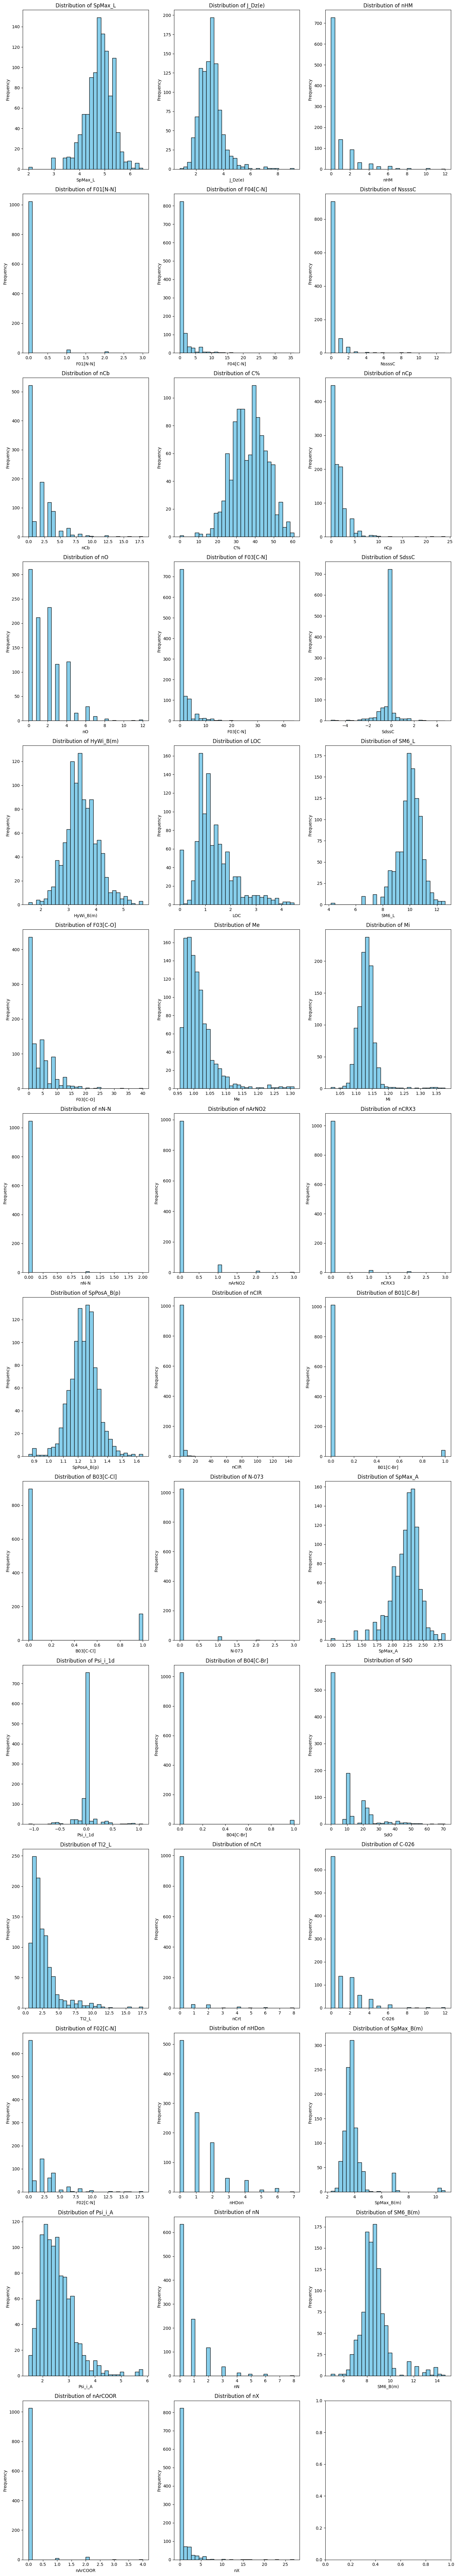

In [11]:
import matplotlib.pyplot as plt

# Get the column names except the last one
column_names = data.columns[:-1]

# Calculate the number of rows and columns for subplots
num_plots = len(column_names)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

# Create subplots for the distribution plots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6*num_rows))

# Iterate over the column names and plot the distribution
for i, column in enumerate(column_names):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    ax.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


In [24]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [25]:
X

array([[ 3.919 ,  2.6909,  0.    , ...,  7.253 ,  0.    ,  0.    ],
       [ 4.17  ,  2.1144,  0.    , ...,  7.257 ,  0.    ,  0.    ],
       [ 3.932 ,  3.2512,  0.    , ...,  7.601 ,  0.    ,  0.    ],
       ...,
       [ 4.869 ,  1.767 ,  0.    , ...,  9.537 ,  1.    ,  0.    ],
       [ 5.158 ,  1.6914,  2.    , ..., 11.055 ,  0.    ,  1.    ],
       [ 5.076 ,  2.6588,  2.    , ...,  9.13  ,  0.    ,  2.    ]])

In [26]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Modelling before fixing the class imbalance

#### Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=1000)
classifier.fit(X_train, y_train)
# save the model with pickle into "models/" folder

LogisticRegression(max_iter=1000, random_state=0)

In [29]:
y_pred = classifier.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 46  13]
 [ 18 134]]


0.8530805687203792

In [31]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.56 %
Standard Deviation: 3.28 %


#### XGBoost classifier

In [32]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 53   6]
 [ 19 133]]


0.8815165876777251

In [35]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 85.53 %
Standard Deviation: 4.05 %


### Modelling after fixing the class imbalnace

In [36]:
# Fixing the class imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100,k_neighbors=3)

X_resampled,y_resampled = sm.fit_resample(X_train, y_train)

In [37]:
y_resampled_series = pd.Series(y_resampled)
y_resampled_series.value_counts()

1    547
0    547
Name: count, dtype: int64

#### Logistic regression

In [39]:
classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter=1000)
classifier.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000, random_state=0)

In [40]:
y_pred = classifier.predict(X_test)

In [41]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 50   9]
 [ 25 127]]


0.8388625592417062

In [42]:
accuracies = cross_val_score(estimator = classifier, X = X_resampled, y = y_resampled, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 87.76 %
Standard Deviation: 4.76 %


#### XGBoost Classifier

In [47]:
# Fitting XGBoost to the Training set
classifier = XGBClassifier()
classifier.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [48]:
y_pred = classifier.predict(X_test)

In [49]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 54   5]
 [ 21 131]]


0.8767772511848341

In [50]:
accuracies = cross_val_score(estimator = classifier, X = X_resampled, y = y_resampled, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.58 %
Standard Deviation: 4.36 %


#### GradientBoost Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()

gb.fit(X_resampled,y_resampled)

y_train_pred = gb.predict(X_resampled)
y_test_pred  = gb.predict(X_test)

print("The R2 of the model in the TRAIN set is: {:.2f}".format(gb.score(X_resampled,y_resampled)))
print("The R2 of the model in the TEST  set is: {:.2f}".format(gb.score(X_test,y_test)))

The R2 of the model in the TRAIN set is: 0.97
The R2 of the model in the TEST  set is: 0.86


In [51]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
accuracy_score(y_test, y_test_pred)

[[ 52   7]
 [ 22 130]]


0.8625592417061612

In [52]:
accuracies = cross_val_score(estimator = gb, X = X_resampled, y = y_resampled, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 89.77 %
Standard Deviation: 3.35 %


#### SVM

In [59]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_resampled, y_resampled)

SVC(random_state=0)

In [60]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [61]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [62]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
display(cm)
accuracy_score(y_test, y_pred)

array([[ 53,   6],
       [ 41, 111]])

0.7772511848341233

In [63]:
accuracies = cross_val_score(estimator = classifier, X = X_resampled, y = y_resampled, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.98 %
Standard Deviation: 4.90 %


#### Perfoming GridSearch on XGBoost classifier

In [64]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}

# Create an XGBoost classifier
classifier = XGBClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(classifier, param_grid, cv=5)

# Fit the grid search to the resampled data
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best Score:  0.8930710904444723


#### Perfoming GridSearch on GradientBoost classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the GradientBoostingClassifier
classifier = GradientBoostingClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_resampled, y_resampled)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Score:  0.9031251309119852
